<a href="https://colab.research.google.com/github/Sagargomad/My_projects/blob/main/Random_forest_and_decision_tree_for_solubility_prediction_in_binary_Cu_and_Ag_alloys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
#from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
import pandas as pd

In [ ]:
data2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Data_set2.csv")

In [ ]:
data2.rename(columns={'Crystal structure\nfactor':'Crystal structure factor','atomic weight\nFactor':'atomic weight Factor','atomic weight':'atomic weight of solute factor'},inplace=True)

In [ ]:
data2=data2[:62]

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   sl.no                           66 non-null     float64
 1   Solvent                         66 non-null     object 
 2   Solute                          66 non-null     object 
 3   Alloy                           71 non-null     object 
 4   atomic radius of solvent        66 non-null     float64
 5   atomic radius of solute         66 non-null     float64
 6   size difference                 71 non-null     float64
 7   size factor                     66 non-null     float64
 8   electronegativity of solute     66 non-null     float64
 9   electronegativity of solvent    66 non-null     float64
 10  electronegativity Factor        66 non-null     float64
 11  valency of solute               66 non-null     float64
 12  valency of solvent              66 non

In [ ]:
data2.head()

,sl.no,Solvent,Solute,Alloy,atomic radius of solvent,atomic radius of solute,size difference,size factor,electronegativity of solute,electronegativity of solvent,...,valency of solute,valency of solvent,valence factor,Crystal structure,atomic weight of solute,atomic weight of solvent,atomic weight factor,atomic weight of solute factor,energy factor,solubility
0,1.0,Silver,Lithium,Ag-Li,2.11,1.82,0.29,0.137441,0.98,1.93,...,1.0,1.0,1.0,BCC,6.940000,107.8682,0.935662,6.940000,NaN,60.90
1,2.0,Silver,Berrylium,Ag-Be,2.11,1.53,0.58,0.274882,0.99,1.93,...,2.0,1.0,2.0,HCP,9.012183,107.8682,0.916452,9.012183,NaN,0.36
2,3.0,Silver,Boron,Ag-B,2.11,1.92,0.19,0.090047,2.04,1.93,...,3.0,1.0,3.0,OTHER,10.810000,107.8682,0.899785,10.810000,NaN,0.00
3,4.0,Silver,Carbon,Ag-C,2.11,1.70,0.41,0.194313,2.55,1.93,...,4.0,1.0,4.0,HCP,12.011000,107.8682,0.888651,12.011000,NaN,0.00
4,5.0,Silver,Nitrogen,Ag-N,2.11,1.55,0.56,0.265403,3.04,1.93,...,3.0,1.0,3.0,HCP,14.007000,107.8682,0.870147,14.007000,NaN,NaN


In [ ]:
data2=data2.dropna()
data2=data2.reset_index(drop=True)

In [ ]:
data2.columns

Index(['sl.no', 'Solvent', 'Solute', 'Alloy', 'atomic radius of solvent',
       'atomic radius of solute', 'size difference', 'size factor',
       'electronegativity of solute', 'electronegativity of solvent',
       'electronegativity Factor', 'valency of solute', 'valency of solvent',
       'valence factor', 'Crystal structure', 'atomic weight of solute',
       'atomic weight of solvent', 'atomic weight factor',
       'atomic weight of solute factor', 'energy factor', 'solubility', 'BCC',
       'FCC', 'HCP', 'ORTHOROMBIC', 'MONOCLINIC', 'OTHER'],
      dtype='object')

In [ ]:
data2.drop(columns='energy factor',inplace=True)

In [ ]:
data2=data2.dropna()

In [ ]:
data2.shape

(59, 20)

In [ ]:
import numpy as np

In [ ]:
# Create dummy variables for the catgeorical variable crystal structure
data2['BCC'] = np.where(data2['Crystal structure']=='BCC', 1, 0)
data2['FCC'] = np.where(data2['Crystal structure']=='FCC', 1, 0)
data2['HCP'] = np.where(data2['Crystal structure']=='HCP', 1, 0)
data2['ORTHOROMBIC'] = np.where(data2['Crystal structure']=='ORTHOROMBIC', 1, 0)
data2['MONOCLINIC'] = np.where(data2['Crystal structure']=='MONOCLINIC', 1, 0)
data2['OTHER'] = np.where(data2['Crystal structure']=='OTHER', 1, 0)

In [ ]:
X =data2[['size factor','atomic weight factor','electronegativity Factor','valence factor','BCC', 'FCC', 'HCP','MONOCLINIC','ORTHOROMBIC',  'OTHER',]].copy()
Y = data2['solubility'].copy()

,size factor,atomic weight factor,electronegativity Factor,valence factor,BCC,FCC,HCP,MONOCLINIC,ORTHOROMBIC,OTHER,solubility
size factor,1.00,0.69,-0.31,0.12,-0.11,-0.27,0.23,0.40,0.18,-0.27,-0.14
atomic weight factor,0.69,1.00,-0.00,-0.17,0.32,-0.21,0.21,0.27,-0.05,-0.27,-0.07
electronegativity Factor,-0.31,-0.00,1.00,-0.38,0.41,0.13,0.27,-0.41,-0.36,-0.07,0.44
valence factor,0.12,-0.17,-0.38,1.00,-0.24,-0.06,-0.29,-0.24,0.32,0.29,-0.36
BCC,-0.11,0.32,0.41,-0.24,1.00,-0.11,-0.12,-0.06,-0.10,-0.16,0.00
FCC,-0.27,-0.21,0.13,-0.06,-0.11,1.00,-0.22,-0.11,-0.18,-0.30,0.38
HCP,0.23,0.21,0.27,-0.29,-0.12,-0.22,1.00,-0.12,-0.20,-0.33,0.13
MONOCLINIC,0.40,0.27,-0.41,-0.24,-0.06,-0.11,-0.12,1.00,-0.10,-0.16,-0.13
ORTHOROMBIC,0.18,-0.05,-0.36,0.32,-0.10,-0.18,-0.20,-0.10,1.00,-0.27,-0.23
OTHER,-0.27,-0.27,-0.07,0.29,-0.16,-0.30,-0.33,-0.16,-0.27,1.00,-0.20


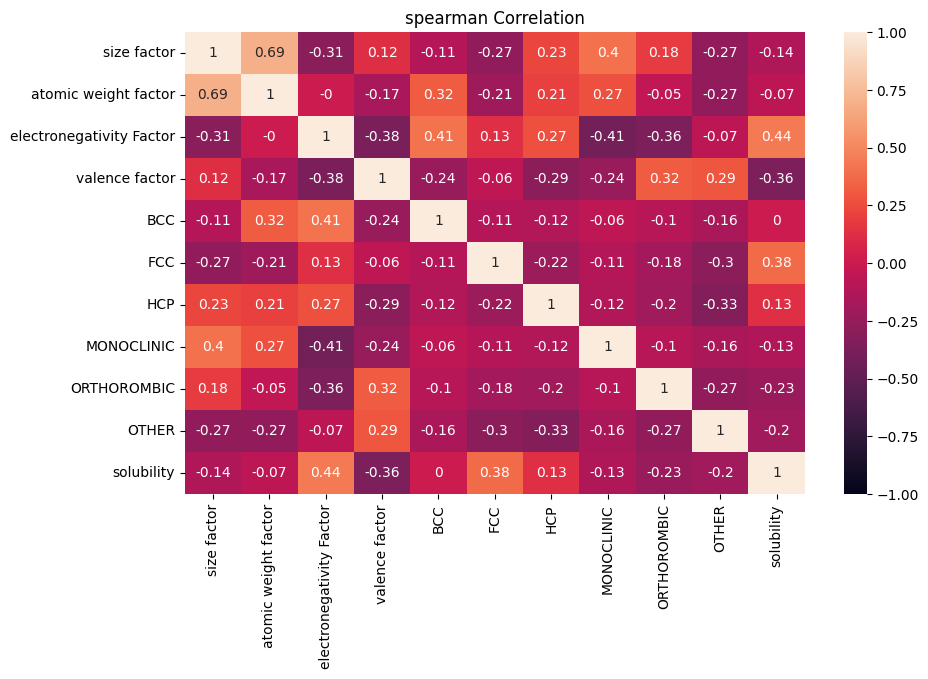

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
def display_correlation(df):
    r = df.corr(method="spearman").round(2)
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(method="spearman").round(2), vmin=-1,
                      vmax=1, annot=True)
    plt.title("spearman Correlation")
    return(r)
display_correlation(X)

In [ ]:
feature=X
labels=Y

In [ ]:
# spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,Y,test_size=0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# random_seed = 42
# np.random.seed(random_seed)
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(feature, labels, test_size = 0.25, random_state = 0)#random_seed
# Transforming data
scaler = MinMaxScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (44, 10)
Training Labels Shape: (44,)
Testing Features Shape: (15, 10)
Testing Labels Shape: (15,)


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf =RandomForestRegressor(bootstrap=False, max_depth=16, max_features='sqrt',
                      min_samples_split=6, n_estimators=556)
# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
# cross_validate also allows to specify metrics which you want to see
for i, score in enumerate(cross_validate(rf, test_features,test_labels, cv=5)["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: -0.1809442902066729
Accuracy for the fold no. 1 on the test set: -94.83250449033612
Accuracy for the fold no. 2 on the test set: 0.0
Accuracy for the fold no. 3 on the test set: -2.6996859113458025
Accuracy for the fold no. 4 on the test set: -0.2975361154489986


Mean Absolute Error: 12.69 degrees.


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn import tree

In [ ]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state =0)
clf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(clf.score(X_train, y_train),
                                                                                             clf.oob_score_,
                                                                                             clf.score(X_test, y_test)))

R^2 Training Score: 0.91 
OOB Score: 0.38 
R^2 Validation Score: 0.33


In [ ]:
# predictzing the result
y_pred1 = clf.predict(X_test)

In [ ]:
# predictzing the result
y_pred_train = clf.predict(X_train)

In [ ]:

from sklearn.model_selection import cross_validate

In [ ]:
# cross_validate also allows to specify metrics which you want to see
for i, score in enumerate(cross_validate(clf, X,Y, cv=5)["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: -12.865782954454428
Accuracy for the fold no. 1 on the test set: -0.3776649007450137
Accuracy for the fold no. 2 on the test set: 0.5608513633323682
Accuracy for the fold no. 3 on the test set: -13.816736348706494
Accuracy for the fold no. 4 on the test set: 0.5469924913160635


In [ ]:
import math

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred1))

22.332566772398174

In [ ]:
math.sqrt(mean_squared_error(y_train, y_pred_train))

10.806704255628746

In [ ]:
mae(y_train, y_pred_train)

NameError: ignored

In [ ]:
mae(y_test, y_pred1)

10.974531538461536

In [ ]:
r2_score(y_train, y_pred_train)

0.9068164761530196

In [ ]:
r2_score(y_test, y_pred1)

0.33279227478186935

In [ ]:
corr = pearsonr(y_train, y_pred_train)
print('Pearson Correlation:', corr)

NameError: ignored

In [ ]:
corr = pearsonr(y_test, y_pred1)
print('Pearson Correlation:', corr)

Pearson Correlation: (0.7428597541035437, 0.003623727943209839)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


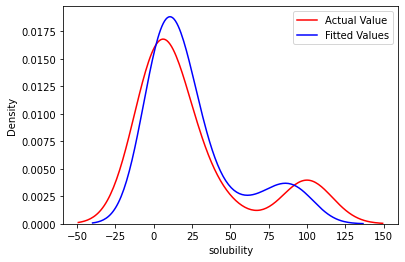

In [ ]:
import seaborn as sns

ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_train, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


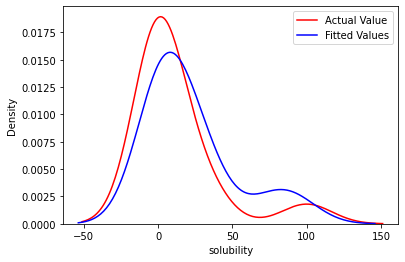

In [ ]:
import seaborn as sns

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred1, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.legend()
plt.show()

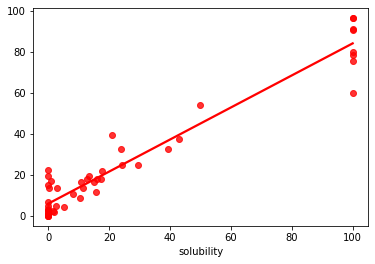

In [ ]:
sns.regplot(x=y_train, y=y_pred_train, ci=None, color="r")

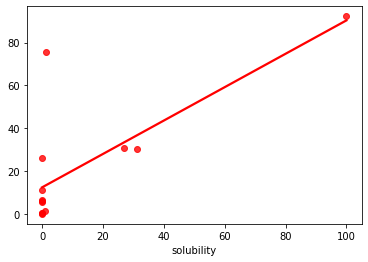

In [ ]:
sns.regplot(x=y_test, y=y_pred1, ci=None, color="r")

Random forest regression Cu and Ag alloys
bold text

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Data_set3.csv')

In [ ]:
clf = RandomForestRegressor(random_state=100)

# Regression
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'Accuracy score without normalization: {metrics.mean_squared_error(y_test, y_pred)}')

## Min-max normalization
sc = MinMaxScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)
clf.fit(X_train_norm, y_train)
y_pred = clf.predict(X_test_norm)
print(f'Accuracy score with min-max normalization: {metrics.mean_squared_error(y_test, y_pred)}')

## Standardization
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)
clf.fit(X_train_norm, y_train)
y_pred = clf.predict(X_test_norm)
print(f'Accuracy score with standardization: {metrics.mean_squared_error(y_test, y_pred)}')

Accuracy score without normalization: 667.506050221314
Accuracy score with min-max normalization: 667.506050221314
Accuracy score with standardization: 667.506050221314


In [ ]:
X

,atomic size factor,atomic weight Factor,electronegativity factor,Valence factor,BCC,FCC,HCP,OTHER,a,b,c,A,B,C,atomic weight of solute factor
0,0.441624,0.982826,-0.29,2.000000,0,0,1,0,90.0000,90.0000,120.0000,470.00,470.00,340.00,1.008000
1,0.223350,0.846453,0.34,1.000000,0,0,1,0,90.0000,90.0000,120.0000,228.58,228.58,358.43,9.012183
2,0.025381,0.815823,-0.13,0.666667,0,0,0,1,58.0530,58.0530,58.0530,506.00,506.00,506.00,10.810000
3,0.137056,0.795360,-0.64,0.500000,0,0,1,0,90.0000,90.0000,120.0000,246.40,246.40,671.10,12.011000
4,0.213198,0.761353,-1.13,0.666667,0,0,1,0,90.0000,90.0000,120.0000,386.10,386.10,626.50,14.007000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,-0.081218,-2.323781,-0.29,0.333333,0,1,0,0,90.0000,90.0000,90.0000,392.42,392.42,392.42,195.084000
58,-0.086294,-2.355855,-0.49,0.400000,0,1,0,0,90.0000,90.0000,90.0000,407.82,407.82,407.82,196.966569
59,-0.131980,-2.417624,0.01,1.000000,0,0,0,1,70.5118,70.5118,70.5118,300.50,300.50,300.50,200.592000
60,0.005076,-2.482163,0.11,0.666667,0,0,1,0,90.0000,90.0000,120.0000,345.66,345.66,552.48,204.380000


In [ ]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state =0)
clf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(clf.score(X_train, y_train),
                                                                                             clf.oob_score_,
                                                                                             clf.score(X_test, y_test)))


R^2 Training Score: 0.92 
OOB Score: 0.38 
R^2 Validation Score: 0.22


In [ ]:
# predictzing the result
y_pred1 = clf.predict(X_test)

In [ ]:
# predictzing the result
y_pred_train = clf.predict(X_train)

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
# cross_validate also allows to specify metrics which you want to see
for i, score in enumerate(cross_validate(clf, X,Y, cv=5)["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: -12.865782954454428
Accuracy for the fold no. 1 on the test set: -0.3776649007450137
Accuracy for the fold no. 2 on the test set: 0.5608513633323682
Accuracy for the fold no. 3 on the test set: -13.816736348706494
Accuracy for the fold no. 4 on the test set: 0.5469924913160635


In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred1))

25.856141702632183

In [ ]:
math.sqrt(mean_squared_error(y_train, y_pred_train))

10.482927161314695

In [ ]:
mae(y_train, y_pred_train)

NameError: ignored

In [ ]:
mae(y_test, y_pred1)

17.88500227272727

In [ ]:
r2_score(y_train, y_pred_train)

0.86785424495175

In [ ]:
r2_score(y_test, y_pred1)

-0.1484283243825959

In [ ]:
corr = pearsonr(y_train, y_pred_train)
print('Pearson Correlation:', corr)

Pearson Correlation: (0.9519784490269632, 3.2977930174486666e-23)


In [ ]:
corr = pearsonr(y_test, y_pred1)
print('Pearson Correlation:', corr)

Pearson Correlation: (0.2481145912333707, 0.2655575473703704)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


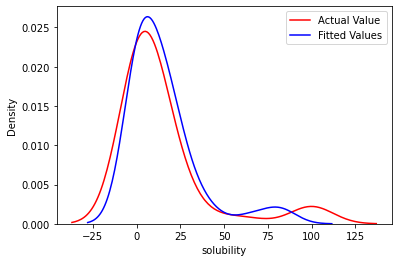

In [ ]:
import seaborn as sns

ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_train, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


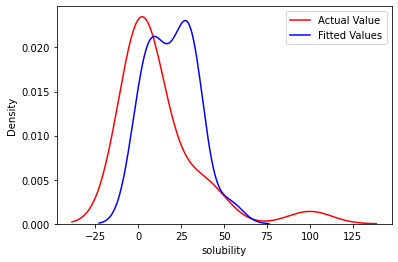

In [ ]:
import seaborn as sns

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred1, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.legend()
plt.show()

In [ ]:
# cross_validate also allows to specify metrics which you want to see
for i, score in enumerate(cross_validate(clf, X,Y, cv=5)["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: -12.865782954454428
Accuracy for the fold no. 1 on the test set: -0.3776649007450137
Accuracy for the fold no. 2 on the test set: 0.5608513633323682
Accuracy for the fold no. 3 on the test set: -13.816736348706494
Accuracy for the fold no. 4 on the test set: 0.5469924913160635


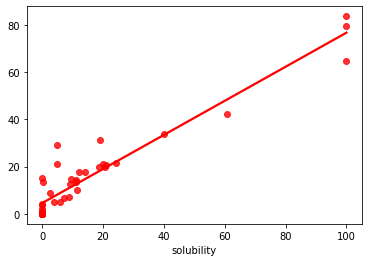

In [ ]:
sns.regplot(x=y_train, y=y_pred_train, ci=None, color="r")

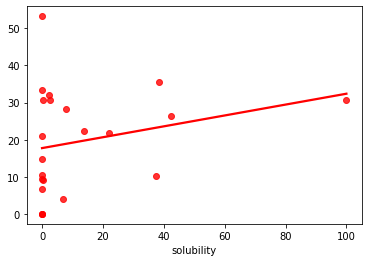

In [ ]:
sns.regplot(x=y_test, y=y_pred1, ci=None, color="r")

In [ ]:
X =data2[['atomic size factor','atomic weight Factor','electronegativity factor','Valence factor','BCC', 'FCC', 'HCP','OTHER','atomic weight of solute factor']].copy()
Y = data2['solubility'].copy()

In [ ]:
# Saving the feature names
features = X.columns.tolist()

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Defining the hyper parameters
hps = {
    'max_depth': 3,
    'min_samples_split': 4,
    'random_state': 0
}

# Loading the tree object
tree = RandomForestRegressor(**hps)

# Fitting on the training data
tree.fit(X_train, y_train)

# Extracting the importances by sklearn
importances_sk = tree.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)

print(f"Feature importance by sklearn: {feature_importance_sk}")

Feature importance by sklearn: {'atomic size factor': 0.124, 'atomic weight Factor': 0.13, 'electronegativity factor': 0.183, 'Valence factor': 0.068, 'BCC': 0.121, 'FCC': 0.161, 'HCP': 0.008, 'OTHER': 0.039, 'atomic weight of solute factor': 0.166}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Data_set3.csv')

In [ ]:
dataset[:1]

,sl.no,Solvent,Solute,Alloy,atomic radius of solvent,atomic radius of solute,size difference,size factor,electronegativity of solute,electronegativity of solvent,...,valency of solute,valency of solvent,valence factor,Crystal structure,atomic weight of solute,atomic weight of solvent,atomic weight factor,atomic weight of solute factor,energy factor,solubility
0,1,Silver,Lithium,Ag-Li,2.11,1.82,0.29,0.137441,0.98,1.93,...,1,1,1.0,BCC,6.94,107.8682,0.935662,6.94,NaN,60.9


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   sl.no                           66 non-null     int64  
 1   Solvent                         66 non-null     object 
 2   Solute                          66 non-null     object 
 3   Alloy                           66 non-null     object 
 4   atomic radius of solvent        66 non-null     float64
 5   atomic radius of solute         66 non-null     float64
 6   size difference                 66 non-null     float64
 7   size factor                     66 non-null     float64
 8   electronegativity of solute     66 non-null     float64
 9   electronegativity of solvent    66 non-null     float64
 10  electronegativity Factor        66 non-null     float64
 11  valency of solute               66 non-null     int64  
 12  valency of solvent              66 non

In [ ]:
dataset.columns

Index(['sl.no', 'Solvent', 'Solute', 'Alloy', 'atomic radius of solvent',
       'atomic radius of solute', 'size difference', 'size factor',
       'electronegativity of solute', 'electronegativity of solvent',
       'electronegativity Factor', 'valency of solute', 'valency of solvent',
       'valence factor', 'Crystal structure', 'atomic weight of solute',
       'atomic weight of solvent', 'atomic weight factor',
       'atomic weight of solute factor', 'energy factor', 'solubility'],
      dtype='object')

In [ ]:
# Create dummy variables for the catgeorical variable crystal structure
dataset['BCC'] = np.where(dataset['Crystal structure']=='BCC', 1, 0)
dataset['FCC'] = np.where(dataset['Crystal structure']=='FCC', 1, 0)
dataset['HCP'] = np.where(dataset['Crystal structure']=='HCP', 1, 0)
dataset['ORTHOROMBIC'] = np.where(dataset['Crystal structure']=='ORTHOROMBIC', 1, 0)
dataset['MONOCLINIC'] = np.where(dataset['Crystal structure']=='MONOCLINIC', 1, 0)
dataset['OTHER'] = np.where(dataset['Crystal structure']=='OTHER', 1, 0)

In [ ]:
dataset=dataset[['size factor','atomic weight of solute factor','electronegativity Factor','valence factor','atomic weight factor','BCC', 'FCC', 'HCP', 'ORTHOROMBIC', 'MONOCLINIC',
       'OTHER','solubility']]

In [ ]:
import pandas as pd
import numpy as np

#rs = np.random.RandomState(0)
#df = pd.DataFrame(dataset.rand(10, 10))
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,size factor,atomic weight of solute factor,electronegativity Factor,valence factor,atomic weight factor,BCC,FCC,HCP,ORTHOROMBIC,MONOCLINIC,OTHER,solubility
size factor,1.000000,-0.575442,-0.433784,0.084455,0.632812,-0.148736,-0.243701,0.257248,0.129435,0.490212,-0.294989,-0.222172
atomic weight of solute factor,-0.575442,1.000000,0.100601,0.195617,-0.924894,-0.255272,0.236362,-0.136068,-0.073394,-0.245335,0.233824,0.200026
electronegativity Factor,-0.433784,0.100601,1.000000,-0.242112,-0.086427,0.439047,0.120578,0.194865,-0.328606,-0.605463,0.066526,0.212228
valence factor,0.084455,0.195617,-0.242112,1.000000,0.003212,-0.209167,-0.071889,-0.278077,0.332523,-0.209167,0.258799,-0.198078
atomic weight factor,0.632812,-0.924894,-0.086427,0.003212,1.000000,0.236099,-0.218609,0.125848,0.067881,0.226909,-0.216262,-0.141196
BCC,-0.148736,-0.255272,0.439047,-0.209167,0.236099,1.000000,-0.119737,-0.131794,-0.107335,-0.064516,-0.179605,0.069196
FCC,-0.243701,0.236362,0.120578,-0.071889,-0.218609,-0.119737,1.000000,-0.244600,-0.199205,-0.119737,-0.333333,0.489086
HCP,0.257248,-0.136068,0.194865,-0.278077,0.125848,-0.131794,-0.244600,1.000000,-0.219265,-0.131794,-0.366900,-0.032699
ORTHOROMBIC,0.129435,-0.073394,-0.328606,0.332523,0.067881,-0.107335,-0.199205,-0.219265,1.000000,-0.107335,-0.298807,-0.166986
MONOCLINIC,0.490212,-0.245335,-0.605463,-0.209167,0.226909,-0.064516,-0.119737,-0.131794,-0.107335,1.000000,-0.179605,-0.139936


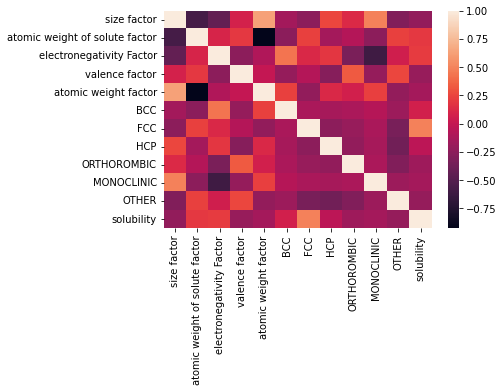

In [ ]:
import seaborn as sns
corr = dataset.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
dependent_variable='solubility'

In [ ]:
# Create a list of independent variables
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [ ]:
independent_variables

['FCC',
 'HCP',
 'atomic weight factor',
 'atomic weight of solute factor',
 'ORTHOROMBIC',
 'valence factor',
 'size factor',
 'BCC',
 'OTHER',
 'electronegativity Factor',
 'MONOCLINIC']

In [ ]:
# Create the data of independent variables
X = dataset[independent_variables]#.values

# Create the dependent variable data
Y= dataset[dependent_variable]#.values

In [ ]:
X[:10]

array([[ 0.        ,  6.94      ,  0.13744076,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.95      ,  1.        ,
         0.93566222],
       [ 0.        ,  9.0121831 ,  0.27488152,  1.        ,  2.        ,
         0.        ,  0.        ,  0.        ,  0.94      ,  0.        ,
         0.9164519 ],
       [ 0.        , 10.81      ,  0.09004739,  0.        ,  3.        ,
         0.        ,  1.        ,  0.        , -0.11      ,  0.        ,
         0.89978511],
       [ 0.        , 12.011     ,  0.1943128 ,  1.        ,  4.        ,
         0.        ,  0.        ,  0.        , -0.62      ,  0.        ,
         0.88865115],
       [ 0.        , 14.007     ,  0.26540284,  1.        ,  3.        ,
         0.        ,  0.        ,  0.        , -1.11      ,  0.        ,
         0.87014709],
       [ 1.        , 15.999     ,  0.27962085,  0.        ,  2.        ,
         0.        ,  0.        ,  0.        , -1.51      ,  0.        ,
         0.851

In [ ]:
# spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,Y,test_size=0.2, random_state = 0)

In [ ]:
# training the dataset
from sklearn.tree import DecisionTreeRegressor
regrassor = DecisionTreeRegressor(random_state = 100)
regrassor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

In [ ]:
# predictzing the result
y_pred1 = regrassor.predict(X_test)

In [ ]:
y_pred_train=regrassor.predict(X_train)

In [ ]:
y_pred_train

array([3.000e-03, 0.000e+00, 0.000e+00, 7.800e+00, 0.000e+00, 4.240e+01,
       2.690e+00, 0.000e+00, 2.615e+00, 0.000e+00, 1.410e+01, 0.000e+00,
       0.000e+00, 1.100e+01, 1.900e+01, 1.125e+01, 0.000e+00, 8.800e+00,
       5.000e+00, 4.000e+01, 4.000e-02, 1.860e+01, 0.000e+00, 9.100e+00,
       2.430e+01, 0.000e+00, 7.200e+00, 0.000e+00, 9.600e+00, 2.060e+01,
       0.000e+00, 5.800e+00, 3.100e-02, 3.600e-01, 1.300e-01, 4.900e+00,
       1.150e+01, 0.000e+00, 2.100e+01, 4.020e-02, 1.200e+01, 1.000e+02,
       0.000e+00, 2.000e+01, 0.000e+00, 1.000e+02, 0.000e+00, 0.000e+00,
       6.090e+01, 0.000e+00, 1.000e+02, 4.000e+00])

In [ ]:
y_pred1

array([ 0.   ,  4.9  ,  2.615, 42.4  ,  7.8  ,  0.   ,  4.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.36 ,  0.36 , 42.4  ])

In [ ]:
 y_test

45      0.023
28    100.000
29     37.300
55      2.200
63      0.280
31      0.000
51      6.830
46      0.000
34     13.700
4       0.000
35      0.290
40      0.000
33     22.000
48     38.270
Name: solubility, dtype: float64

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred1))

31.12503087089691

In [ ]:
math.sqrt(mean_squared_error(y_train, y_pred_train))

0.0

In [ ]:
r2_score(y_train, y_pred_train)

1.0

In [ ]:
r2_score(y_test, y_pred1)

-0.34364972703297125

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
mae(y_train, y_pred_train)

0.0

In [ ]:
mae(y_test, y_pred1)

16.072714285714284

In [ ]:
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import numpy as np

In [ ]:
corr = pearsonr(y_train, y_pred_train)
print('Pearson Correlation:', corr)

Pearson Correlation: (1.0, 0.0)


In [ ]:
corr = pearsonr(y_test, y_pred1)
print('Pearson Correlation:', corr)

Pearson Correlation: (0.0505451892244692, 0.8637534251019042)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


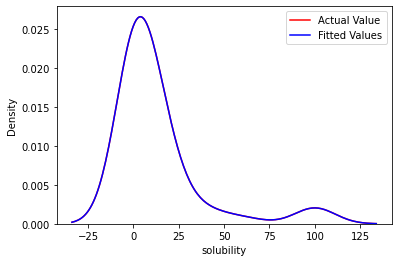

In [ ]:
import seaborn as sns

ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_train, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


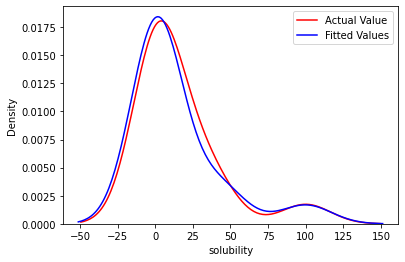

In [ ]:
import seaborn as sns

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred1, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.legend()
plt.show()

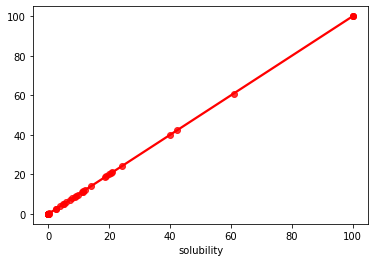

In [ ]:
sns.regplot(x=y_train, y=y_pred_train, ci=None, color="r")

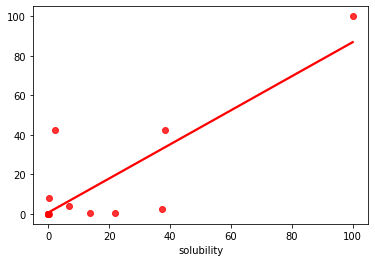

In [ ]:
sns.regplot(x=y_test, y=y_pred1, ci=None, color="r")

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [ ]:
text_representation = tree.export_text(regrassor)
print(text_representation)

|--- feature_4 <= 0.50
|   |--- feature_8 <= 0.06
|   |   |--- feature_8 <= -0.25
|   |   |   |--- feature_8 <= -0.45
|   |   |   |   |--- feature_0 <= 0.70
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_0 >  0.70
|   |   |   |   |   |--- feature_10 <= 25.53
|   |   |   |   |   |   |--- feature_9 <= 0.16
|   |   |   |   |   |   |   |--- value: [0.04]
|   |   |   |   |   |   |--- feature_9 >  0.16
|   |   |   |   |   |   |   |--- feature_10 <= 15.00
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |--- feature_10 >  15.00
|   |   |   |   |   |   |   |   |--- feature_9 <= 0.29
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.80
|   |   |   |   |   |   |   |   |   |   |--- value: [0.03]
|   |   |   |   |   |   |   |   |   |--- feature_0 >  0.80
|   |   |   |   |   |   |   |   |   |   |--- value: [0.04]
|   |   |   |   |   |   |   |   |--- feature_9 >  0.29
|   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |

In [ ]:
X = dataset[independent_variables]

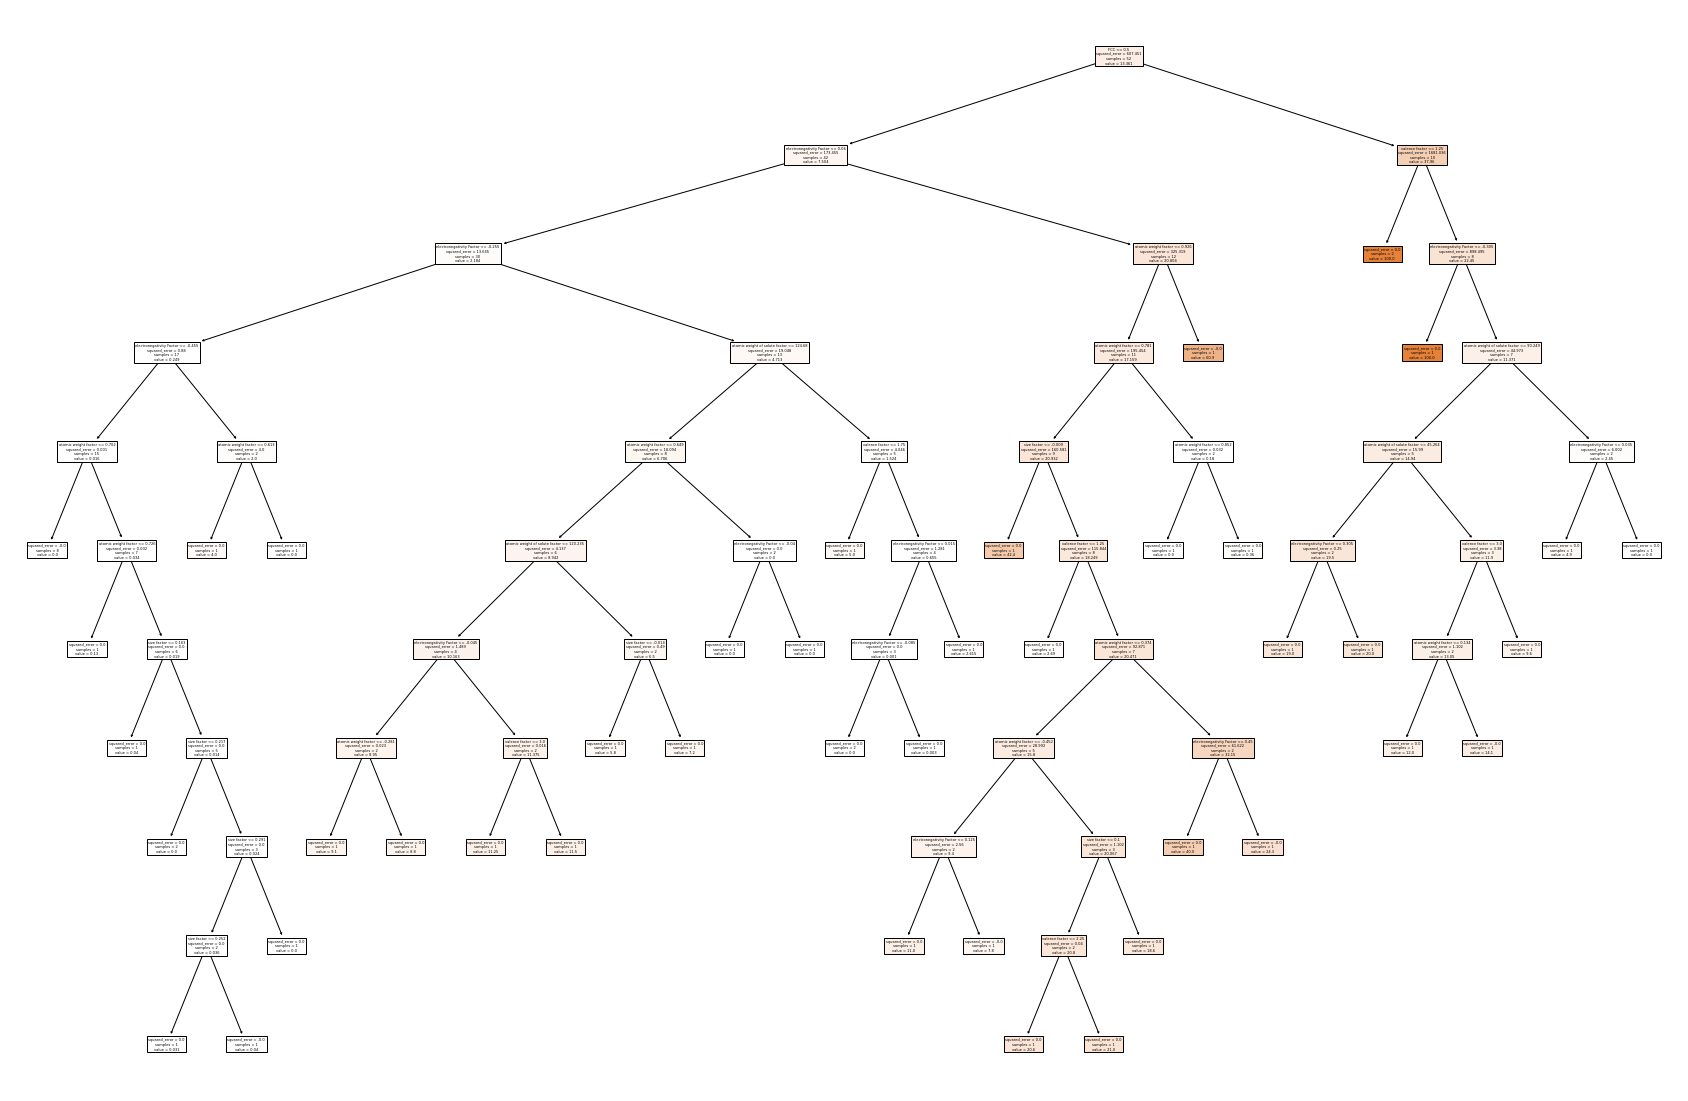

In [ ]:
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(regrassor, feature_names=X.columns, filled=True)

In [ ]:
sklearn.inspection.permutation_importance(estimator, X, Y, *, scoring=None, n_repeats=5, n_jobs=None, random_state=None, sample_weight=None, max_samples=1.0)

SyntaxError: ignored

In [ ]:
# Saving the feature names
features = X.columns.tolist()

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Defining the hyper parameters
hps = {
    'max_depth': 3,
    'min_samples_split': 4,
    'random_state': 0
}

# Loading the tree object
tree = DecisionTreeRegressor(**hps)

# Fitting on the training data
tree.fit(X_train, y_train)

# Extracting the importances by sklearn
importances_sk = tree.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)

print(f"Feature importance by sklearn: {feature_importance_sk}")

Feature importance by sklearn: {'atomic weight factor': 0.0, 'MONOCLINIC': 0.0, 'FCC': 0.252, 'size factor': 0.244, 'ORTHOROMBIC': 0.0, 'BCC': 0.0, 'electronegativity Factor': 0.06, 'valence factor': 0.342, 'OTHER': 0.0, 'atomic weight of solute factor': 0.102, 'HCP': 0.0}


In [ ]:
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
y_pred_train=tree.predict(X_train)

In [ ]:
y_pred=tree.predict(X_test)

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred))

26.605644205174894

In [ ]:
math.sqrt(mean_squared_error(y_train, y_pred_train))

7.637561780517744

In [ ]:
r2_score(y_train, y_pred_train)

0.9078544108758602

In [ ]:
r2_score(y_test, y_pred)

-0.12370023722327805

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
mae(y_train, y_pred_train)

5.183238377948581

In [ ]:
mae(y_test, y_pred)

15.788944147355911

In [ ]:
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import numpy as np

In [ ]:
corr = pearsonr(y_train, y_pred_train)
print('Pearson Correlation:', corr)

Pearson Correlation: (0.952813943472628, 5.608282458137622e-26)


In [ ]:
corr = pearsonr(y_test, y_pred)
print('Pearson Correlation:', corr)

Pearson Correlation: (0.17282918797938437, 0.507116069230758)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


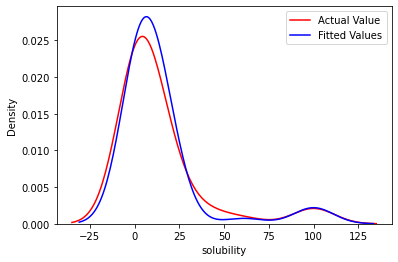

In [ ]:
import seaborn as sns

ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_train, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


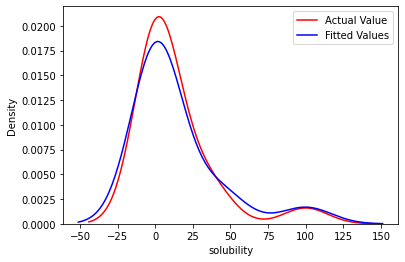

In [ ]:
import seaborn as sns

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred1, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.legend()
plt.show()

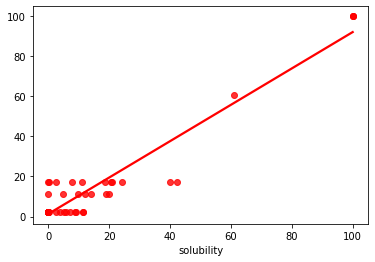

In [ ]:
sns.regplot(x=y_train, y=y_pred_train, ci=None, color="r")

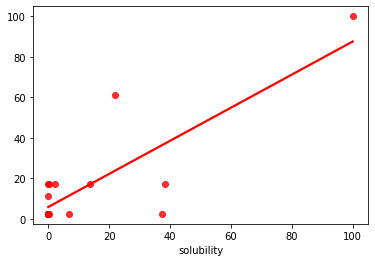

In [ ]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="r")

In [ ]:
# Import scikit-learn libraries
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# create the range 1 to 25
rn = range(1,26)

In [ ]:
# to demonstrate how the data are split, we will create 3 and 5 folds.
# KFold function has to be applied on the data and it returns an location (index) of the train and test samples.
kf5 = KFold(n_splits=5, shuffle=False)
kf3 = KFold(n_splits=3, shuffle=False)

In [ ]:
# Let's split our test range into 5 and3  folds and display the splits on the chart.
# In order to clearly show which data belongs to each set, we will shift the values by -.1 and +.1
# the first fold will contain values 0.9 in train and 1.1 in the test set, second 1.9 and 2.1, etc.
# we will also give each sets the different color
# because we will repeat this exercise for the shuffled version, let's create a function

def kfoldize(kf, rn, shift=.1):
    train = pd.DataFrame()
    test = pd.DataFrame()
    i = 1
    for train_index, test_index in kf.split(rn):
        train_df = pd.DataFrame(np.take(rn, train_index), columns=["x"])
        train_df["val"] = i - shift
        train = train.append(train_df)

        test_df = pd.DataFrame(np.take(rn, test_index), columns=["x"])
        test_df["val"] = i + shift
        test = test.append(test_df)
        i += 1
    return train, test

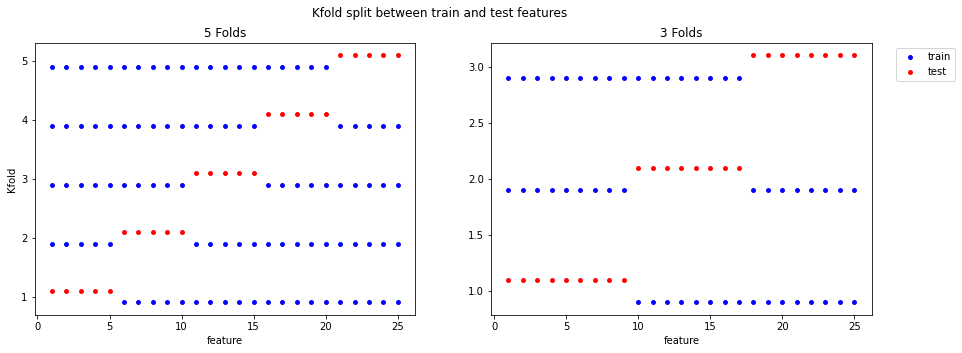

In [ ]:

train5, test5 = kfoldize(kf5,rn)
train3, test3 = kfoldize(kf3,rn)

fig,ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train5)
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test5)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train3)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test3)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[1].set_xlabel("feature")
ax[0].set_title("5 Folds")
ax[1].set_title("3 Folds")
plt.suptitle("Kfold split between train and test features")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
# cross_validate also allows to specify metrics which you want to see
for i, score in enumerate(cross_validate(tree, X,Y, cv=5)["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.20761028734491982
Accuracy for the fold no. 1 on the test set: 0.7545212686667864
Accuracy for the fold no. 2 on the test set: -0.13440089611429729
Accuracy for the fold no. 3 on the test set: 0.13859730064952558
Accuracy for the fold no. 4 on the test set: -2.709404913745218


In [ ]:
X = dataset[independent_variables]

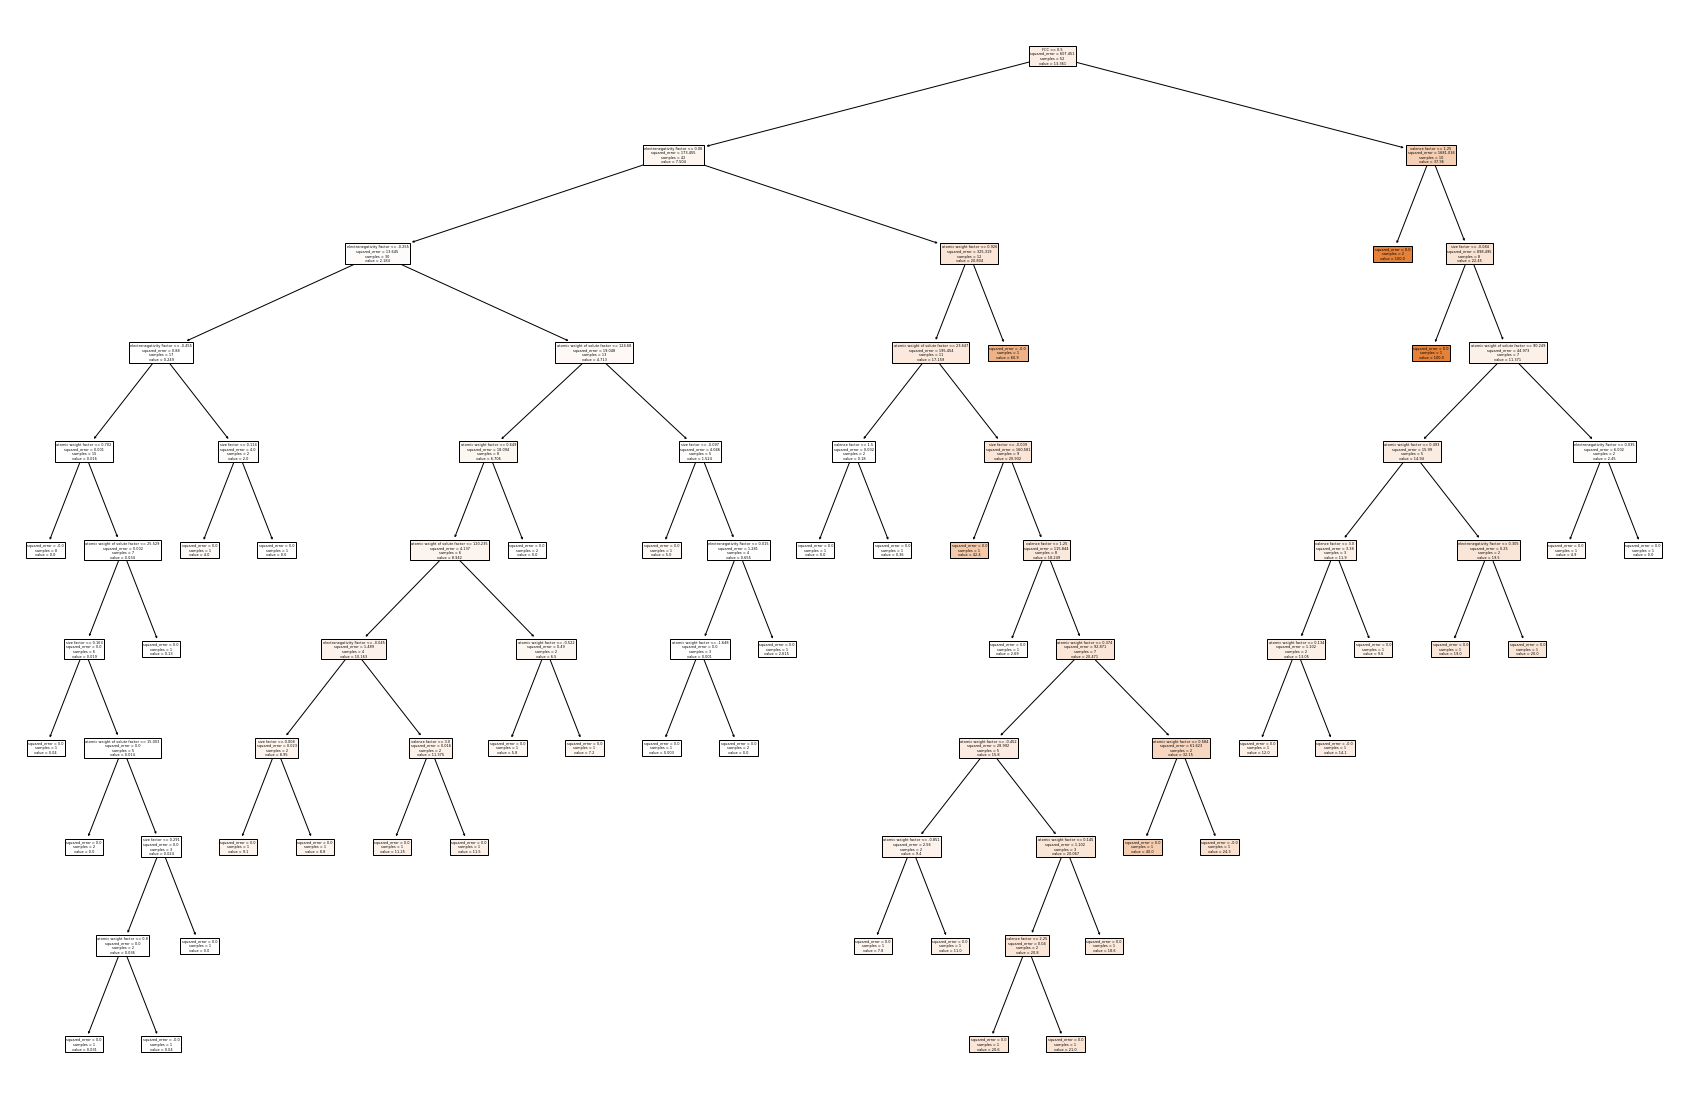

In [ ]:
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(regrassor, feature_names=X.columns, filled=True)

In [ ]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(tree, out_file=None, feature_names=X.columns))

TypeError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model=tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')
model.fit(X_train,y_train)

ValueError: ignored